#### Exercise-2 : Logistic Regression

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

In [2]:
# Reading the dataset
data=pd.read_csv("ex2data1.csv",names=["exam1","exam2","admission"])

In [3]:
data.head()

,exam1,exam2,admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
# examine for the missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
exam1        100 non-null float64
exam2        100 non-null float64
admission    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


In [5]:
#seperating the independent varibles and dependent varibles 
x=data.iloc[:,:-1].values
y=data.iloc[:,2].values

In [6]:
# reshaping y
y=y.reshape((100,1))
import math as m

In [7]:
# splitting the train set and test set
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

/home/sai/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
# shapes of the dataset of train and test
print("size of the train sets :",x_train.shape,y_train.shape)
print("size of the test sets :",x_test.shape,y_test.shape)

size of the train sets : (80, 2) (80, 1)
size of the test sets : (20, 2) (20, 1)


###### Building logistic regression model

In [89]:
def Linear_equ(features,para,bias):
    return (np.dot(features,para)+bias)
def sigmoid(features,para,bias):
    Le=Linear_equ(features,para,bias)
    return 1/(1+np.exp(-Le))
def GradientDescent(features,targets,para,bias,learning_rate):
    m=len(features)
    num_iters=100
    for _ in range(num_iters):
        pre=sigmoid(features,para,bias)
        tar=pre-targets
        para=para-(learning_rate/m)*np.dot(features.T,tar)
        bias=bias-(learning_rate/m)*sum(tar)
    return para,bias
def Cost_function(features,targets,para,bias):
    hypo=sigmoid(features,para,bias)
    
    l=len(features)
    error=0
    for i,j in zip(hypo,targets):
        
        
        if(j==1):
            k1=m.log(i)
            error+=j*k1
        else:
            k0=m.log(1-i)
            error+=(1-j)*k0
    error=-error
    return error

In [39]:
learning_rate=0.3
para=np.zeros((x_train.shape[1],1))-1
bias=0
p,b=GradientDescent(x_train,y_train,para,bias,learning_rate)
print(p)
print(b)


[[1.9696641 ]
 [1.95918558]]
[0.74216506]


In [40]:
yy_pre=sigmoid(x_test,p,b)

prect=[]
for i in yy_pre:
    if(i>0.5):
        prect.append(1)
    else:
        prect.append(0)
print(prect)
print(y_test)

[1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1]
[[1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]]


In [41]:
init_error=Cost_function(x_train,y_train,para,bias)
final_error=Cost_function(x_train,y_train,p,b)
print(init_error)
print(final_error)

[114.51874599]
[19.07510821]


In [42]:
y_Pre=sigmoid(x_test,p,b)

In [43]:
y_P=Linear_equ(x_test,p,b)

In [44]:
temp0=data.loc[data["admission"]==0]
temp0=temp0.iloc[:,:-1].values

In [45]:
temp1=data.loc[data["admission"]==1]
temp1=temp1.iloc[:,:-1].values

In [48]:
# feature scalling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)


In [49]:
x_test=sc.fit_transform(x_test)

In [50]:
# applying the logidtic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
Y_pre=lr.predict(x_test)
print(prect)

[1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1]


/home/sai/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
Y_pre

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1])

In [53]:
li=[]
for i in y_pre:
    if(i<0.65):
        li.append(0)
    else:
        li.append(1)
print(li)

NameError: name 'y_pre' is not defined

In [54]:
import seaborn as sns
sns.set(style='white')
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = lr.predict_proba(grid)[:, 1].reshape(xx.shape)

[(-5, 5), Text(0,0.5,'$X_2$'), (-5, 5), Text(0.5,0,'$X_1$'), None]

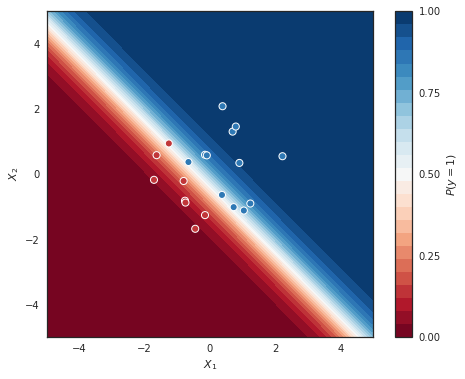

In [55]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(x_test[:,0], x_test[:,1], c=y_test[:,0], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

[(-5, 5), Text(0,0.5,'$X_2$'), (-5, 5), Text(0.5,0,'$X_1$'), None]

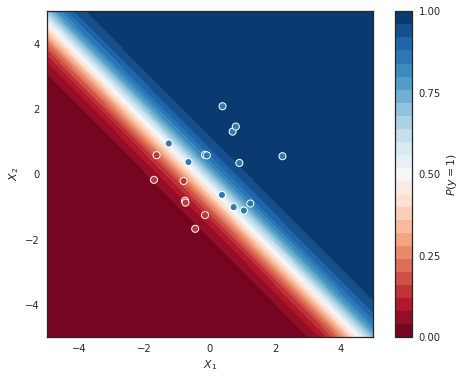

In [56]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(x_test[:,0], x_test[:,1], c=prect, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

### Logistic Regression with the polynomial features

In [58]:
p_data=pd.read_csv("ex2data2.csv",names=["M_test1","M_test2","Result"])
p_data.head()

,M_test1,M_test2,Result
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [71]:
x1=p_data["M_test1"]
x2=p_data["M_test2"]
d3=x1*x2
p_data["d3"]=d3

In [72]:
d4=x1**2
d5=x2**2
d6=x1**3
d7=x2*x1**2
d8=x1*x2**2
d9=x2**3
d10=x1**4
d11=x2*x1**3
d12=(x1**2)*(x2**2)
d13=x1*x2**3
d14=x2**4
d15=x1**5
d16=x2*x1**4
d17=(x1**3)*(x2**2)
d18=(x1**2)*(x2**3)
d19=(x1)*(x2**4)
d20=x2**5
d21=x1**6
d22=(x1**5)*(x2)
d23=(x1**4)*(x2**2)
d24=(x1**3)*(x2**3)
d25=(x1**2)*(x2**4)
d26=(x1)*(x2**5)
d27=x2**6
p_data["d4"]=d4
p_data["d5"]=d5
p_data["d6"]=d6
p_data["d7"]=d7
p_data["d8"]=d8
p_data["d9"]=d9
p_data["d10"]=d10
p_data["d11"]=d11
p_data["d12"]=d12
p_data["d13"]=d13
p_data["d14"]=d14
p_data["d15"]=d15
p_data["d16"]=d16
p_data["d17"]=d17
p_data["d18"]=d18
p_data["d19"]=d19
p_data["d20"]=d20
p_data["d21"]=d21
p_data["d22"]=d22
p_data["d23"]=d23
p_data["d24"]=d24
p_data["d25"]=d25
p_data["d26"]=d26
p_data["d27"]=d27


In [73]:
p_data.head()

,M_test1,M_test2,Result,d3,d4,d5,d6,d7,d8,d9,...,d18,d19,d20,d21,d22,d23,d24,d25,d26,d27
0,0.051267,0.69956,1,0.035864,0.002628,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,-0.092742,0.68494,1,-0.063523,0.008601,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,-0.213710,0.69225,1,-0.147941,0.045672,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,-0.375000,0.50219,1,-0.188321,0.140625,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,-0.513250,0.46564,1,-0.238990,0.263426,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [74]:
# splitting in to dependent and independent variables 
p_y=p_data.iloc[:,2].values

In [78]:
c=p_data.drop("Result",axis=1)

In [79]:
p_x=c.iloc[:,:].values

- Here we have the data is the p_x and p_y are independent and the dependent variables 

In [82]:
#Now we have to splitt data in to train and test
from sklearn.cross_validation import train_test_split
px_train,px_test,py_train,py_test=train_test_split(p_x,p_y,test_size=0.2,random_state=0)

In [84]:
# the shapes of the train and test data
py_train=py_train.reshape((94,1))
py_test=py_test.reshape((24,1))
print("the shape of the train data :",px_train.shape,py_train.shape)
print("the shape of the test data :",px_test.shape,py_test.shape)

the shape of the train data : (94, 27) (94, 1)
the shape of the test data : (24, 27) (24, 1)


In [116]:
learning_rate=2
p_para=np.zeros((px_train.shape[1],1))-1
p_bias=0
p_p,p_b=GradientDescent(px_train,py_train,p_para,p_bias,learning_rate)
print(p_p)
print(p_b)


[[ 1.89732851]
 [ 2.56839484]
 [-1.49859985]
 [-2.6809112 ]
 [-2.36335583]
 [ 0.02866796]
 [-1.16383551]
 [-0.85222797]
 [-0.48421923]
 [-2.44438123]
 [-0.67312125]
 [-1.64941438]
 [-0.86973322]
 [-2.34424639]
 [-0.94121383]
 [-1.121697  ]
 [-0.8015573 ]
 [-1.28746646]
 [-1.06381744]
 [-1.2102178 ]
 [-2.15056424]
 [-0.73063989]
 [-1.30673789]
 [-0.80305414]
 [-1.39338271]
 [-0.87963394]
 [-2.11238486]]
[1.96946629]


In [117]:
py_pre=sigmoid(px_test,p_p,p_b)

p_prect=[]
for i in py_pre:
    if(i>0.5):
        p_prect.append(1)
    else:
        p_prect.append(0)
print(p_prect)

print(py_test)

[0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1]
[[0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]]


In [118]:
P_init_cost=Cost_function(px_train,py_train,p_para,p_bias)
print(P_init_cost)

[83.11399177]


In [119]:
P_final_cost=Cost_function(px_train,py_train,p_p,p_b)
print(P_final_cost)

[35.28238086]


- Building the model from the scikit learn


In [120]:
from sklearn.linear_model import LogisticRegression
p_lr=LogisticRegression()
p_lr.fit(px_train,py_train)
p_s_prect=p_lr.predict(px_test)

/home/sai/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [122]:
print(p_s_prect)
print(p_prect)

[0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1]
[0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1]


#### Visulalization of the Data 

In [164]:
pp_temp1=p_data.loc[p_data["Result"]==1]
pp_temp1=pp_temp1.iloc[:,:2].values
pp_temp1.shape

(58, 2)

In [165]:
pp_temp2=p_data.loc[p_data["Result"]==0]
pp_temp2=pp_temp2.iloc[:,:2].values

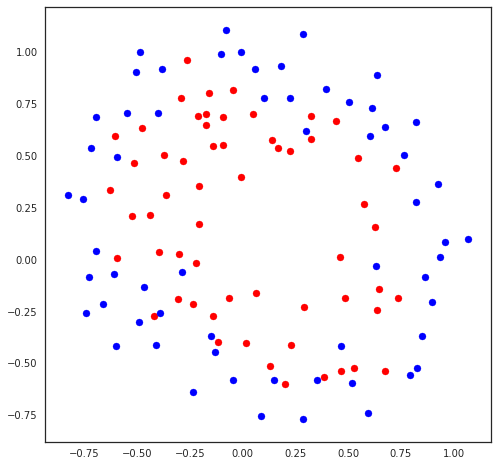

In [189]:
%matplotlib inline
plt.figure(figsize=(8,8))
plt.scatter(pp_temp1[:,0],pp_temp1[:,1],color="red")
plt.scatter(pp_temp2[:,0],pp_temp2[:,1],color="blue")

plt.show()